In [1]:
import baostock as bs
import pandas as pd

#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:'+lg.error_code)
print('login respond  error_msg:'+lg.error_msg)

login success!
login respond error_code:0
login respond  error_msg:success


In [2]:
#### 获取沪深A股"sh.688083"历史K线数据 ####
# 详细指标参数，参见“历史行情指标参数”章节；“分钟线”参数与“日线”参数不同。“分钟线”不包含指数。
# 分钟线指标：date,time,code,open,high,low,close,volume,amount,adjustflag
# 周月线指标：date,code,open,high,low,close,volume,amount,adjustflag,turn,pctChg
rs = bs.query_history_k_data_plus("sh.688083",
    "date,code,open,high,low,close,preclose,volume,amount,adjustflag,turn,tradestatus,pctChg,isST",
    start_date='2021-07-01', end_date='2023-12-31',
    frequency="d", adjustflag="3")
print('query_history_k_data_plus respond error_code:'+rs.error_code)
print('query_history_k_data_plus respond  error_msg:'+rs.error_msg)

query_history_k_data_plus respond error_code:0
query_history_k_data_plus respond  error_msg:success


In [3]:
#### 打印结果集 ####
data_list = []
while (rs.error_code == '0') & rs.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(rs.get_row_data())
result = pd.DataFrame(data_list, columns=rs.fields)

#### 结果集输出到csv文件 ####   
result.to_csv("D:\Program Files (x86)\Python310\\history_ZWSOFT_stock_k_data.csv", index=False)

#### 登出系统 ####
bs.logout()

logout success!


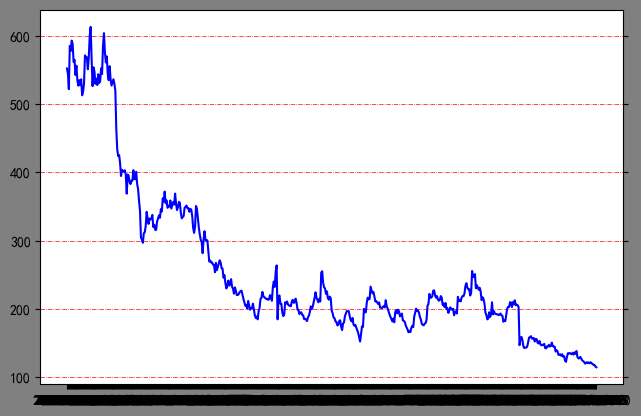

In [19]:
#### 绘制上市至今股价走势图 ####

import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
file_path = r'D:\Program Files (x86)\Python310\history_ZWSOFT_stock_k_data.csv'
data = pd.read_csv(file_path)

# 提取横坐标和纵坐标数据
x = data.iloc[:, 0]  # 假设第一列是横坐标
y = data.iloc[:, 6]  # 假设第二列是纵坐标

plt.figure(facecolor='0.5') #设置底层画布的底色和大小
plt.rcParams['font.sans-serif']=['SimHei']
plt.grid(color='r',linestyle='-.',linewidth='0.5',axis='y') #设置网格线
plt.plot(x,y,color='b',linestyle='-',marker='',mfc='w') #直线图
#设置图表与画布的间距
#left,bottom值越大，间距就大，right,top值越小，间距就越大
plt.subplots_adjust(left=0.06,right=0.97,top=0.9,bottom=0.12) #参数值相当于百分比
#设置坐标轴刻度及方向
plt.tick_params(left=1,right=1,top=0,bottom=1)
plt.rcParams['xtick.direction'] = 'in'  # 将x轴的刻度方向设置向外
plt.rcParams['ytick.direction'] = 'in'  # 将y轴的刻度方向设置向外
plt.show()